<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.205540,21.447524,89.649796,2.929021e-04,190.303152,190.302890,0.000262
1,0.0,1.0,55.261855,21.438324,51.602165,-1.739755e-04,138.302170,138.302331,-0.000161
2,0.0,2.0,98.909239,73.161929,40.150657,-2.122757e-06,222.221823,222.221795,0.000028
3,0.0,3.0,34.046716,74.120775,64.194833,5.365912e-06,182.362330,182.362339,-0.000009
4,0.0,4.0,21.359952,56.670333,63.779915,6.868282e-06,151.810207,151.810215,-0.000008
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,93.115569,46.251200,70.762881,1.148363e-05,220.129661,220.129612,0.000049
19996,999.0,16.0,98.579396,71.903493,25.313343,-1.071033e-07,205.796232,205.796168,0.000064
19997,999.0,17.0,44.986209,91.597312,25.078083,-2.499803e-06,171.661602,171.661622,-0.000020
19998,999.0,18.0,65.925309,66.562412,70.139191,3.347520e-06,212.626915,212.626925,-0.000010


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.205540,21.447524,89.649796,2.929021e-04,190.303152,190.302890,0.000262
1,0.0,1.0,55.261855,21.438324,51.602165,-1.739755e-04,138.302170,138.302331,-0.000161
2,0.0,2.0,98.909239,73.161929,40.150657,-2.122757e-06,222.221823,222.221795,0.000028
3,0.0,3.0,34.046716,74.120775,64.194833,5.365912e-06,182.362330,182.362339,-0.000009
4,0.0,4.0,21.359952,56.670333,63.779915,6.868282e-06,151.810207,151.810215,-0.000008
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,93.115569,46.251200,70.762881,1.148363e-05,220.129661,220.129612,0.000049
19996,999.0,16.0,98.579396,71.903493,25.313343,-1.071033e-07,205.796232,205.796168,0.000064
19997,999.0,17.0,44.986209,91.597312,25.078083,-2.499803e-06,171.661602,171.661622,-0.000020
19998,999.0,18.0,65.925309,66.562412,70.139191,3.347520e-06,212.626915,212.626925,-0.000010


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.205540  21.447524  89.649796  ...  190.303152  190.302890  0.000262
      1.0    55.261855  21.438324  51.602165  ...  138.302170  138.302331 -0.000161
      2.0    98.909239  73.161929  40.150657  ...  222.221823  222.221795  0.000028
      3.0    34.046716  74.120775  64.194833  ...  182.362330  182.362339 -0.000009
      4.0    21.359952  56.670333  63.779915  ...  151.810207  151.810215 -0.000008
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   93.115569  46.251200  70.762881  ...  220.129661  220.129612  0.000049
      16.0   98.579396  71.903493  25.313343  ...  205.796232  205.796168  0.000064
      17.0   44.986209  91.597312  25.078083  ...  171.661602  171.661622 -0.000020
      18.0   65.925309  66.562412  70.139191  ...  212.626915  212.626925 -0.000010
      19.0   88.616884  97.239668  57.796865  ...  253.653418  253.653420 -0.000002

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.205540  21.447524  89.649796  ...  190.303152  190.302890  0.000262
      1.0    55.261855  21.438324  51.602165  ...  138.302170  138.302331 -0.000161
      2.0    98.909239  73.161929  40.150657  ...  222.221823  222.221795  0.000028
      3.0    34.046716  74.120775  64.194833  ...  182.362330  182.362339 -0.000009
      4.0    21.359952  56.670333  63.779915  ...  151.810207  151.810215 -0.000008
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   93.115569  46.251200  70.762881  ...  220.129661  220.129612  0.000049
      16.0   98.579396  71.903493  25.313343  ...  205.796232  205.796168  0.000064
      17.0   44.986209  91.597312  25.078083  ...  171.661602  171.661622 -0.000020
      18.0   65.925309  66.562412  70.139191  ...  212.626915  212.626925 -0.000010
      19.0   88.616884  97.239668  57.796865  ...  253.653418  253.653420 -0.000002

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.205540,21.447524,89.649796,2.929021e-04,190.303152,190.302890,0.000262
1,0.0,1.0,55.261855,21.438324,51.602165,-1.739755e-04,138.302170,138.302331,-0.000161
2,0.0,2.0,98.909239,73.161929,40.150657,-2.122757e-06,222.221823,222.221795,0.000028
3,0.0,3.0,34.046716,74.120775,64.194833,5.365912e-06,182.362330,182.362339,-0.000009
4,0.0,4.0,21.359952,56.670333,63.779915,6.868282e-06,151.810207,151.810215,-0.000008
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,93.115569,46.251200,70.762881,1.148363e-05,220.129661,220.129612,0.000049
19996,999.0,16.0,98.579396,71.903493,25.313343,-1.071033e-07,205.796232,205.796168,0.000064
19997,999.0,17.0,44.986209,91.597312,25.078083,-2.499803e-06,171.661602,171.661622,-0.000020
19998,999.0,18.0,65.925309,66.562412,70.139191,3.347520e-06,212.626915,212.626925,-0.000010


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.205540  21.447524  89.649796  ...  190.303152  190.302890  0.000262
      1.0    55.261855  21.438324  51.602165  ...  138.302170  138.302331 -0.000161
      2.0    98.909239  73.161929  40.150657  ...  222.221823  222.221795  0.000028
      3.0    34.046716  74.120775  64.194833  ...  182.362330  182.362339 -0.000009
      4.0    21.359952  56.670333  63.779915  ...  151.810207  151.810215 -0.000008
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   93.115569  46.251200  70.762881  ...  220.129661  220.129612  0.000049
      16.0   98.579396  71.903493  25.313343  ...  205.796232  205.796168  0.000064
      17.0   44.986209  91.597312  25.078083  ...  171.661602  171.661622 -0.000020
      18.0   65.925309  66.562412  70.139191  ...  212.626915  212.626925 -0.000010
      19.0   88.616884  97.239668  57.796865  ...  253.653418  253.653420 -0.000002

[20000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

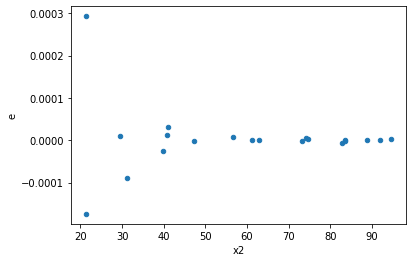

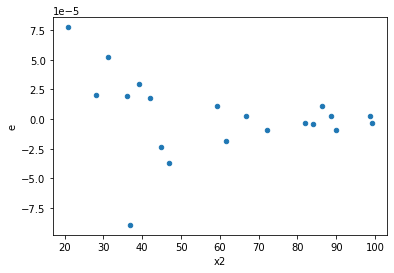

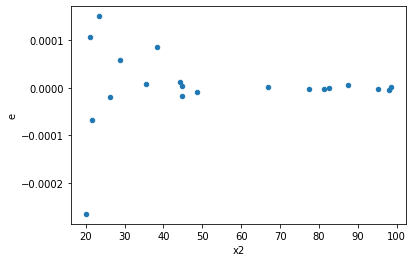

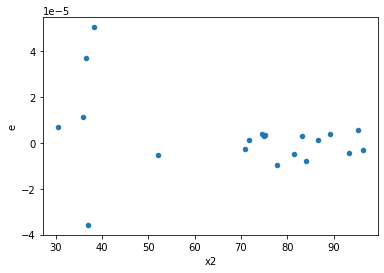

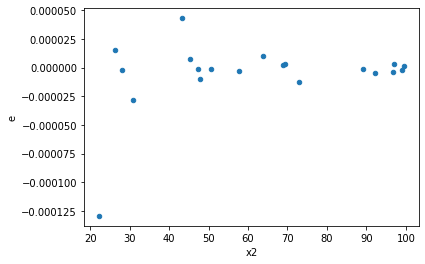

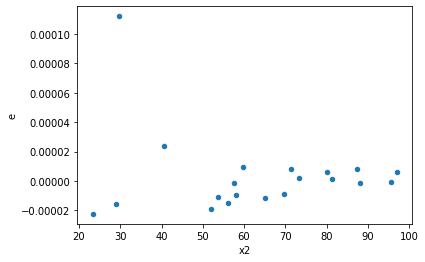

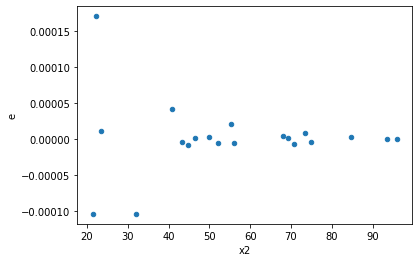

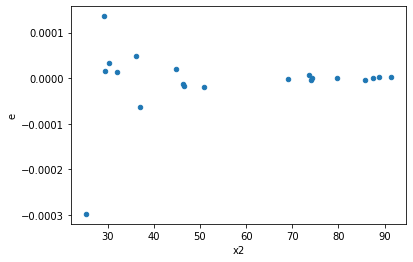

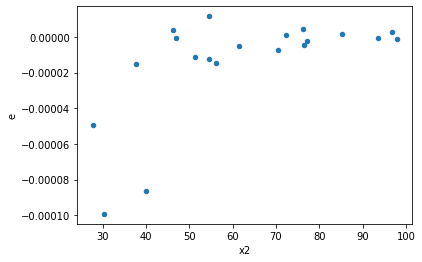

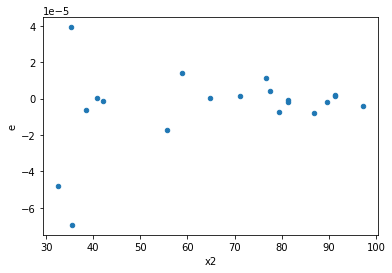

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,7.586961987990331e-11,9.012826221585909e-08,1.8967404969975827e-11,2.2532065553964772e-08,0.0008417961027384946,2.227106771498288e-07,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,2.70033349682375e-10,1.0044921988506142e-08,6.750833742059375e-11,2.5112304971265354e-09,0.026882573104237095,0.0011711498577904815,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,7.975022577580033e-11,6.85680251546599e-08,1.9937556443950083e-11,1.7142006288664975e-08,0.0011630818533262144,4.991736783775039e-07,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,1.252991042627695e-10,2.677459711127702e-09,3.1324776065692376e-11,6.693649277819255e-10,0.046797755253615216,0.004373292812734284,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,1.7371118834713301e-10,7.023124989171933e-09,4.3427797086783254e-11,1.7557812472929833e-09,0.024734172980682572,0.0009581188307303912,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,9.042601362135211e-11,1.164172384967203e-08,2.2606503405338027e-11,2.9104309624180073e-09,0.007767407541100503,5.619819739825194e-05,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,7.657102020211876e-11,1.2047468808006992e-08,1.914275505052969e-11,3.011867202001748e-09,0.0063557765886248325,3.4207899868264945e-05,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,5.4222574298351944e-11,1.0240706493104932e-07,1.3555643574587986e-11,2.560176623276233e-08,0.0005294807964163411,6.995734980561176e-08,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,5.539784715071484e-11,4.5695821408308416e-09,1.384946178767871e-11,1.1423955352077104e-09,0.012123175696025983,0.000168418567429502,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    982
Reject005=1 : Homoscedasticity       18
Name: Result_test, dtype: int64